<a href="https://colab.research.google.com/github/NagaEswar379/CRIME-RATE-PREDICTION/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
pyo.init_notebook_mode()
import seaborn as sns
import plotly.express as px
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')
df.head()

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          50                      46  ...     30                1131   
1          23                      53  ...     69                1543   
2          27                      59  ...     38                2088   
3          20                      25  ...     23                 795   
4          23                      49  ...     41                1244   

   DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0            16                                                149     
1             7                                                118     
2            14                                                112     
3            17                                                126     
4            12                                                109     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   
3                          38                                   57   
4                          58                                  247   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          181   
1                                            0                          270   
2                                            0                          404   
3                                            0                          233   
4                                            0                          431   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  
0              1518              4154  
1               754              4125  
2              1262              5818  
3              1181              3140  
4              2313              6507  

[5 rows x 33 columns]

In [ ]:
print("Columns in our dataset: " , df.columns)

Columns in our dataset:  Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')


In [ ]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: 
 ['YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']


List of Categorical features: 
 ['STATE/UT', 'DISTRICT']


In [ ]:
df.isnull().sum(axis=0)

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [ ]:
categorical_col = df[['STATE/UT','DISTRICT']]
for i in categorical_col:
    print(df[i].value_counts(), end="\n\n")

UTTAR PRADESH        878
MADHYA PRADESH       628
MAHARASHTRA          552
BIHAR                540
TAMIL NADU           469
RAJASTHAN            454
ODISHA               430
KARNATAKA            399
GUJARAT              384
ANDHRA PRADESH       370
ASSAM                362
JAMMU & KASHMIR      322
PUNJAB               314
JHARKHAND            312
WEST BENGAL          309
HARYANA              268
CHHATTISGARH         266
KERALA               233
ARUNACHAL PRADESH    195
DELHI UT             183
HIMACHAL PRADESH     176
UTTARAKHAND          168
NAGALAND             138
MANIPUR              125
MIZORAM              108
MEGHALAYA             96
TRIPURA               67
SIKKIM                60
A & N ISLANDS         36
DAMAN & DIU           36
GOA                   36
PUDUCHERRY            31
CHANDIGARH            24
D & N HAVELI          24
LAKSHADWEEP           24
Name: STATE/UT, dtype: int64

TOTAL              408
G.R.P.              46
SOUTH               37
NORTH               37
WES

<ipython-input-11-056a4264044e>:20: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



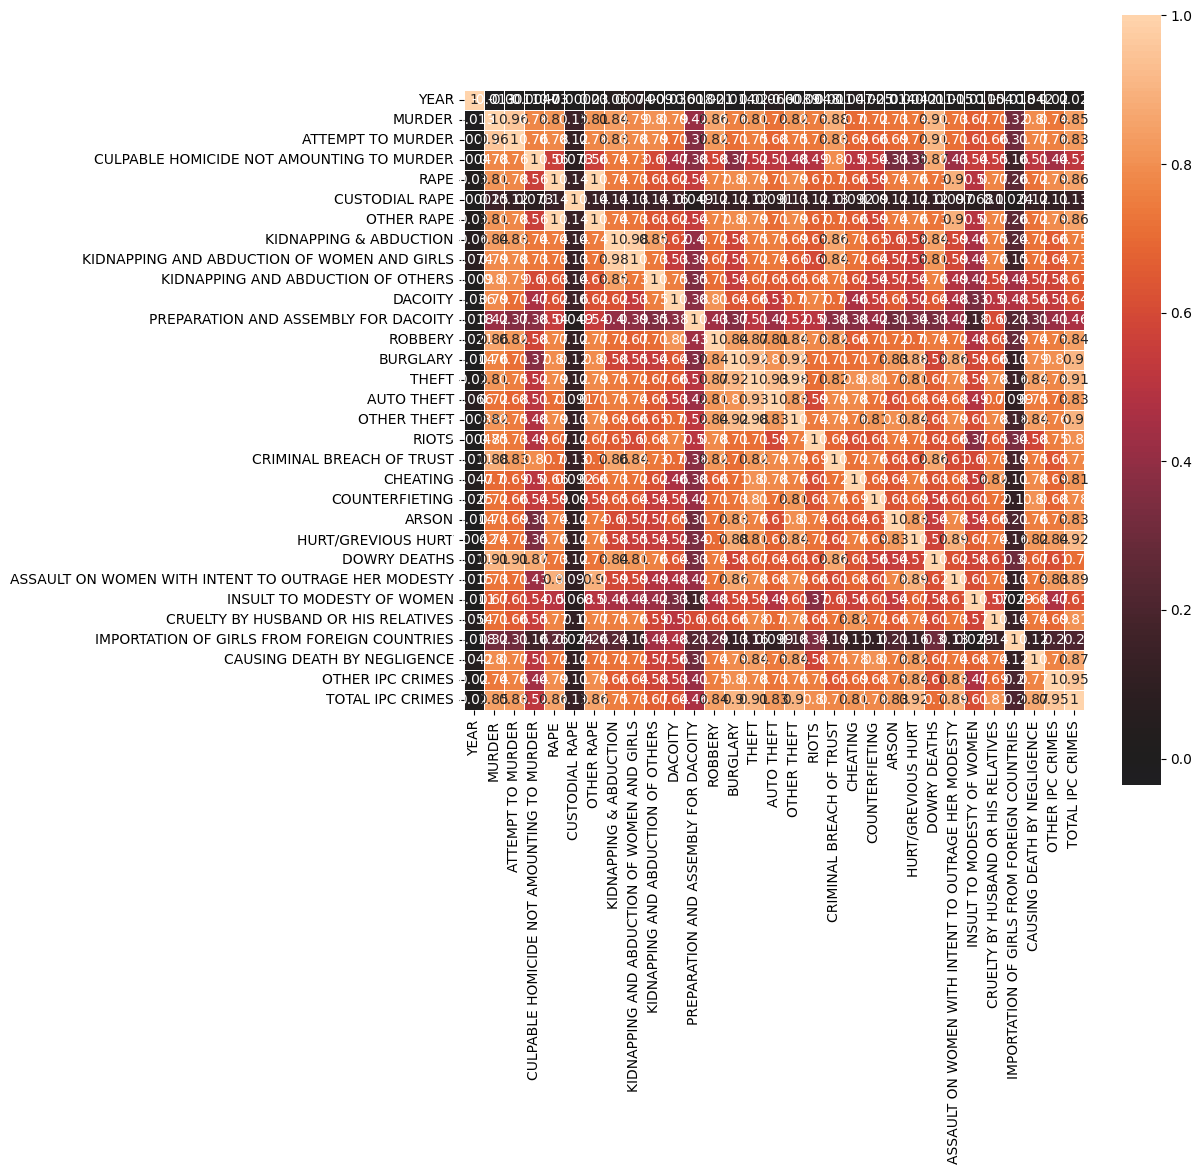

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into the 'df' DataFrame
df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')

# Calculate the correlation and create a heatmap
corr = df[['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']].corr()

f, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(corr, square=True, annot=True, linewidth=.4, center=0, ax=axes)
plt.show()


In [ ]:
print(df["STATE/UT"].value_counts())

UTTAR PRADESH        878
MADHYA PRADESH       628
MAHARASHTRA          552
BIHAR                540
TAMIL NADU           469
RAJASTHAN            454
ODISHA               430
KARNATAKA            399
GUJARAT              384
ANDHRA PRADESH       370
ASSAM                362
JAMMU & KASHMIR      322
PUNJAB               314
JHARKHAND            312
WEST BENGAL          309
HARYANA              268
CHHATTISGARH         266
KERALA               233
ARUNACHAL PRADESH    195
DELHI UT             183
HIMACHAL PRADESH     176
UTTARAKHAND          168
NAGALAND             138
MANIPUR              125
MIZORAM              108
MEGHALAYA             96
TRIPURA               67
SIKKIM                60
A & N ISLANDS         36
DAMAN & DIU           36
GOA                   36
PUDUCHERRY            31
CHANDIGARH            24
D & N HAVELI          24
LAKSHADWEEP           24
Name: STATE/UT, dtype: int64


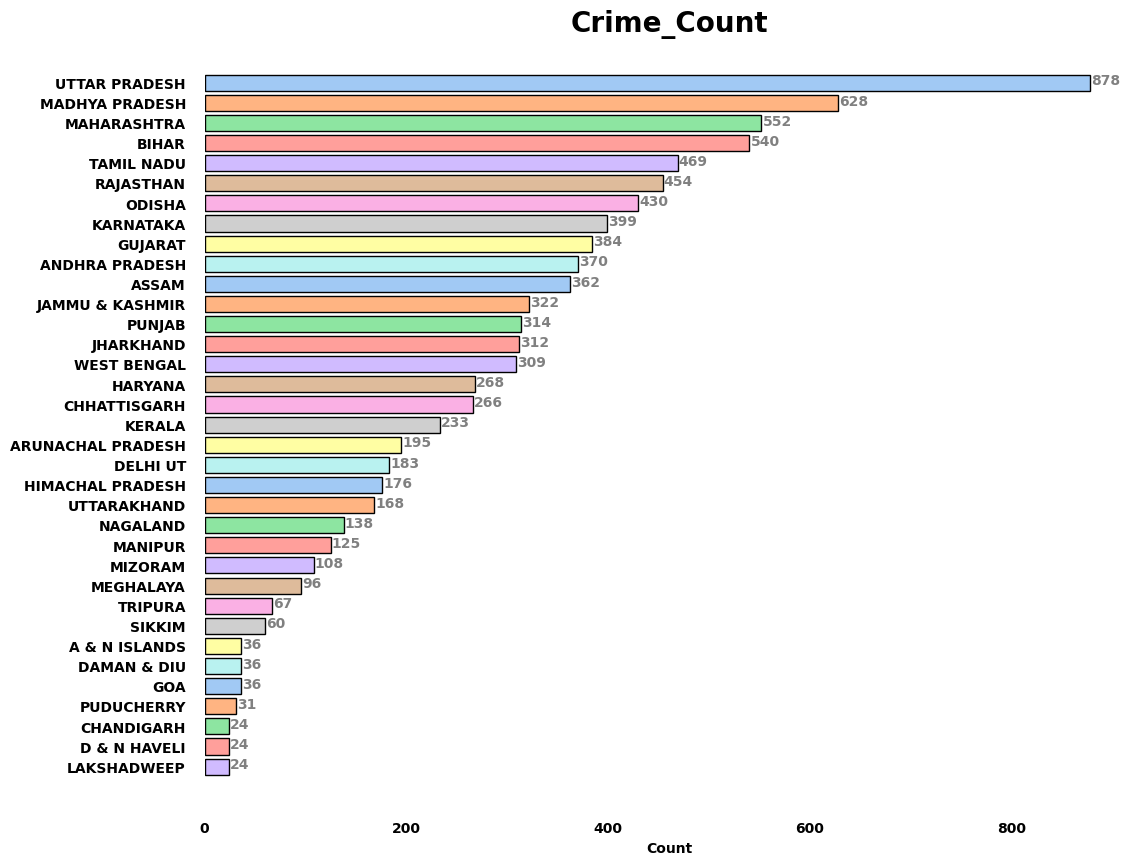

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 10))
title_cnt = df["STATE/UT"].value_counts().sort_values(ascending=False).reset_index()
mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor='black', color=sns.color_palette('pastel', len(title_cnt)))

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Show top values
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Crime_Count', weight='bold', fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width() + 1, i.get_y() + 0.5, str(round(i.get_width(), 2)),
            fontsize=10, fontweight='bold', color='grey')

plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')
X = df[['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
        'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
        'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
        'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
        'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
        'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
        'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN',
        'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
        'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']]

y = df['YEAR']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)


y_pred = linear_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 11.60928668283582
R-squared: 0.04811629665203199


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')

X = df[['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
        'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
        'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
        'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
        'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
        'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
        'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN',
        'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
        'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']]

y = df['YEAR']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_regressor.fit(X_train, y_train)


y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 9.254567627494446
R-squared: 0.24118747802412144


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')
X = df[['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
        'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
        'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
        'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
        'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
        'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
        'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN',
        'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
        'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']]

y = df['YEAR']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)
y_pred = random_forest_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 5.8888929437059785
R-squared: 0.5171502455734611


In [ ]:
import pandas as pd


df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')


df_encoded = pd.get_dummies(df, columns=['STATE/UT', 'DISTRICT'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')


label_encoder = LabelEncoder()


df['STATE/UT'] = label_encoder.fit_transform(df['STATE/UT'])
df['DISTRICT'] = label_encoder.fit_transform(df['DISTRICT'])


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')


X = df[['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
        'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
        'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
        'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
        'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
        'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
        'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN',
        'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
        'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']]

y = df[['YEAR']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


<ipython-input-1-3a749e03d0f5>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_classifier.fit(X_train, y_train)


Accuracy: 0.0958980044345898


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')

# Define your feature and target variables
X = df[['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
        'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
        'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
        'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
        'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
         'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
        'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN',
        'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
        'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']]

y = df[['YEAR']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train.values.ravel())  # .ravel() is used to convert y_train to a 1D array

# Make predictions on the test set
y_pred = random_forest_regressor.predict(X_test)

# Calculate a regression metric (e.g., Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 5.8551821971048215


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')

# Convert 'YEAR' to classes by rounding to the nearest year
df['YEAR'] = df['YEAR'].round().astype(int)

# Define your feature and target variables
X = df[['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
        'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
        'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
        'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
        'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
         'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
        'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN',
        'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
        'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']]

y = df[['YEAR']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train.values.ravel())  # .ravel() is used to convert y_train to a 1D array

# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.08425720620842572


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')

# Define your features (X) and target (y)
X = df[['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
        'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
        'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
        'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
        'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
         'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
        'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN',
        'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
        'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']]
y = df['YEAR']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.06541019955654102


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')


X = df[['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
        'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
        'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
        'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
        'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
         'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
        'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN',
        'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
        'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']]
y = df['YEAR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train, y_train)
y_pred = logistic_regression_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.13082039911308205


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')


X = df[['TOTAL IPC CRIMES']]
y = df['YEAR']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_classifier = DecisionTreeClassifier(random_state=42)

decision_tree_classifier.fit(X_train, y_train)

y_pred = decision_tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.08536585365853659


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')


area_to_predict = 'ANDHRA PRADESH'
district_to_predict = 'KURNOOL'
year_to_predict = 2027
data = df[['DISTRICT', 'STATE/UT', 'YEAR', 'TOTAL IPC CRIMES']]


label_encoder_state_ut = LabelEncoder()
label_encoder_district = LabelEncoder()


data['STATE/UT'] = label_encoder_state_ut.fit_transform(data['STATE/UT'])
data['DISTRICT'] = label_encoder_district.fit_transform(data['DISTRICT'])

model = LinearRegression()

X = data[['DISTRICT', 'STATE/UT', 'YEAR']]
y = data['TOTAL IPC CRIMES']

model.fit(X, y)
input_data = pd.DataFrame({
    'STATE/UT': [area_to_predict],
    'DISTRICT': [district_to_predict],
    'YEAR': [year_to_predict]
})

input_data['STATE/UT'] = label_encoder_state_ut.transform(input_data['STATE/UT'])
input_data['DISTRICT'] = label_encoder_district.transform(input_data['DISTRICT'])

predicted_crimes = model.predict(input_data[['DISTRICT', 'STATE/UT', 'YEAR']])

print(f'Predicted TOTAL IPC CRIMES in {area_to_predict} in {district_to_predict} in {year_to_predict}: {predicted_crimes[0]}')


Predicted TOTAL IPC CRIMES in ANDHRA PRADESH in KURNOOL in 2027: 7559.3609162262


<ipython-input-5-d65ef6bdc97e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['STATE/UT'] = label_encoder_state_ut.fit_transform(data['STATE/UT'])
<ipython-input-5-d65ef6bdc97e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISTRICT'] = label_encoder_district.fit_transform(data['DISTRICT'])


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')

area_to_predict = 'TAMIL NADU'
district_to_predict = 'MADURAI URBAN'
year_to_predict = 2029

data = df[['DISTRICT', 'STATE/UT', 'YEAR', 'TOTAL IPC CRIMES']]

label_encoder_state_ut = LabelEncoder()
label_encoder_district = LabelEncoder()

data['STATE/UT'] = label_encoder_state_ut.fit_transform(data['STATE/UT'])
data['DISTRICT'] = label_encoder_district.fit_transform(data['DISTRICT'])

model = RandomForestRegressor(n_estimators=100)


X = data[['DISTRICT', 'STATE/UT', 'YEAR']]
y = data['TOTAL IPC CRIMES']
model.fit(X, y)


input_data = pd.DataFrame({
    'STATE/UT': [area_to_predict],
    'DISTRICT': [district_to_predict],
    'YEAR': [year_to_predict]
})

input_data['STATE/UT'] = label_encoder_state_ut.transform(input_data['STATE/UT'])
input_data['DISTRICT'] = label_encoder_district.transform(input_data['DISTRICT'])


predicted_crimes = model.predict(input_data[['DISTRICT', 'STATE/UT', 'YEAR']])

print(f'Predicted TOTAL IPC CRIMES in {area_to_predict} in {district_to_predict} in {year_to_predict}: {predicted_crimes[0]}')


<ipython-input-7-6bcaa89f5660>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['STATE/UT'] = label_encoder_state_ut.fit_transform(data['STATE/UT'])
<ipython-input-7-6bcaa89f5660>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISTRICT'] = label_encoder_district.fit_transform(data['DISTRICT'])


Predicted TOTAL IPC CRIMES in TAMIL NADU in MADURAI URBAN in 2029: 3306.59


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')

area_to_predict = 'TAMIL NADU'
district_to_predict = 'MADURAI URBAN'
year_to_predict = 2030

data = df[['DISTRICT', 'STATE/UT', 'YEAR', 'MURDER']]

label_encoder_state_ut = LabelEncoder()
label_encoder_district = LabelEncoder()

data['STATE/UT'] = label_encoder_state_ut.fit_transform(data['STATE/UT'])
data['DISTRICT'] = label_encoder_district.fit_transform(data['DISTRICT'])

model = LogisticRegression()

threshold = 100
data['TARGET'] = (data['MURDER'] > threshold).astype(int)
X = data[['DISTRICT', 'STATE/UT', 'YEAR']]
y = data['TARGET']

model.fit(X, y)

input_data = pd.DataFrame({
    'STATE/UT': [area_to_predict],
    'DISTRICT': [district_to_predict],
    'YEAR': [year_to_predict]
})
input_data['STATE/UT'] = label_encoder_state_ut.transform(input_data['STATE/UT'])
input_data['DISTRICT'] = label_encoder_district.transform(input_data['DISTRICT'])

predicted_probability = model.predict_proba(input_data[['DISTRICT', 'STATE/UT', 'YEAR']])[:, 1]

print(f'Predicted probability of crime occurrence in {area_to_predict} in {district_to_predict} in {year_to_predict}: {predicted_probability[0]}')


Predicted probability of crime occurrence in TAMIL NADU in MADURAI URBAN in 2030: 0.11029644115586391


<ipython-input-3-d8026130a3e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['STATE/UT'] = label_encoder_state_ut.fit_transform(data['STATE/UT'])
<ipython-input-3-d8026130a3e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISTRICT'] = label_encoder_district.fit_transform(data['DISTRICT'])
<ipython-input-3-d8026130a3e0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')

area_to_predict = 'ANDHRA PRADESH'
district_to_predict = 'KURNOOL'
year_to_predict = 2024

data = df[['DISTRICT', 'STATE/UT', 'YEAR', 'TOTAL IPC CRIMES']]

label_encoder_state_ut = LabelEncoder()
label_encoder_district = LabelEncoder()

data['STATE/UT'] = label_encoder_state_ut.fit_transform(data['STATE/UT'])
data['DISTRICT'] = label_encoder_district.fit_transform(data['DISTRICT'])

model = KNeighborsRegressor(n_neighbors=5)

X = data[['DISTRICT', 'STATE/UT', 'YEAR']]
y = data['TOTAL IPC CRIMES']

model.fit(X, y)

input_data = pd.DataFrame({
    'STATE/UT': [area_to_predict],
    'DISTRICT': [district_to_predict],
    'YEAR': [year_to_predict]
})

input_data['STATE/UT'] = label_encoder_state_ut.transform(input_data['STATE/UT'])
input_data['DISTRICT'] = label_encoder_district.transform(input_data['DISTRICT'])

predicted_crimes = model.predict(input_data[['DISTRICT', 'STATE/UT', 'YEAR']])

print(f'Predicted TOTAL IPC CRIMES in {area_to_predict} in {district_to_predict} in {year_to_predict}: {predicted_crimes[0]}')


Predicted TOTAL IPC CRIMES in ANDHRA PRADESH in KURNOOL in 2024: 7090.8


<ipython-input-37-f00721c74370>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['STATE/UT'] = label_encoder_state_ut.fit_transform(data['STATE/UT'])
<ipython-input-37-f00721c74370>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISTRICT'] = label_encoder_district.fit_transform(data['DISTRICT'])


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')

area_to_predict = 'TAMIL NADU'
district_to_predict = 'MADURAI RURAL'
year_to_predict = 2026


data = df[['DISTRICT', 'STATE/UT', 'YEAR', 'TOTAL IPC CRIMES']]


label_encoder_state_ut = LabelEncoder()
label_encoder_district = LabelEncoder()


data['STATE/UT'] = label_encoder_state_ut.fit_transform(data['STATE/UT'])
data['DISTRICT'] = label_encoder_district.fit_transform(data['DISTRICT'])
model = LinearRegression()


X = data[['DISTRICT', 'STATE/UT', 'YEAR']]
y = data['TOTAL IPC CRIMES']

model.fit(X, y)

def classify_area(district_name):

    encoded_district = label_encoder_district.transform(['MADURAI RURAL'])[0]


    input_data = pd.DataFrame({
        'STATE/UT': [area_to_predict],
        'DISTRICT': [encoded_district],
        'YEAR': [year_to_predict]
    })


    input_data['STATE/UT'] = label_encoder_state_ut.transform(input_data['STATE/UT'])

    predicted_crimes = model.predict(input_data[['DISTRICT', 'STATE/UT', 'YEAR']])


    threshold = 1000

    if predicted_crimes > threshold:
        return "High Crime Area"
    else:
        return "Low Crime Area"

district_name_to_classify = 'Your District Name'
area_classification = classify_area(district_name_to_classify)
print(f"{district_name_to_classify} is classified as: {area_classification}")



Your District Name is classified as: High Crime Area


<ipython-input-58-f59ed3a908f3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['STATE/UT'] = label_encoder_state_ut.fit_transform(data['STATE/UT'])
<ipython-input-58-f59ed3a908f3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISTRICT'] = label_encoder_district.fit_transform(data['DISTRICT'])
